In [2]:
import tensorflow as tf

In [ ]:
var1 = tf.Variable(10)  # variable 메소드 호출
print(var1)

var2 = tf.Variable(10)  # variable 메소드 호출/ Variable 객체 만들기
print(var2)

# 지연실행(lazy evaluation)
sess = tf.Session()   # Session 객체 만들기
sess.run(tf.global_variables_initializer())   # 변수 초기화
var_result = sess.run(var1)
print('var1=', var_result)

var2_result = sess.run(var2)
print('var2 =', var2_result)
# [2] placeholder:

var3 = var1 * var2
print(var3)

print('var3 =', sess.run(var3))

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
add_node = a+b
sess = tf.Session()

result  = sess.run(add_node,feed_dict={a:3.2,b:4.5})
print(result)


# 텐서플로로 예측모델 유형
#### 1. Linear regression : 입력과 출력값이 비례 관계
          예측방정식: H(x) = Wx + b
          
## 2. classification(분류) 모델
2.1 binary classification : 0과 1처럼 답이 반드시 2개(=future이 2개)
    sigmoid 함수 사용 

2.2 multi-nomial classification : 답이 세가지 이상
    softmax 함수 : 여러개 확률 중에 가장 큰 함수를 찾는다!
    
    
        


# 1. Linear Regression: 선형 회귀
### 선형 회계 목표 : cost가 가장 작은 weight을 구하는 것
- Hypothesis(가설): 예측(가설) 방정식 H(x)

- cost(비용) : loss(손실), 비용함수
- Gradient Descent Algorithm(경사하강법) : 비용함수를 미분


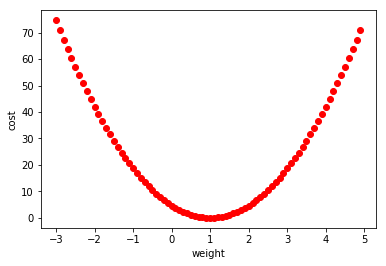

In [24]:
# 예측(가설) 방정식 : hx = w * x
# 답 : y
# 비용(cost) 함수
import matplotlib.pyplot as plt

def cost(x,y,w):
    c=0
    for i in range(len(x)):
        hx = w * x[i]
        loss = (hx - y[i])**2
        c += loss # c = c + loss
    return c/len(x) 


x = [1,2,3]
y = [1,2,3]

cost(x,y,-1)
cost(x,y,0) # w 가 x축 cost가 y축인 graph를 비용함수 그래프

# 비용함수를 시각화 
for i in range(-30,50):
    w = i/10
    c = cost(x,y,w)
#     print(w,c)
    plt.plot(w,c,'ro')
plt.xlabel('weight')
plt.ylabel('cost')

plt.show()

# Gradient Descent Algorithm(경사하강법): 비용함수를 미분 



### 미분
- 미분 : 순간 변화율 , 기울기
       x 축으로 1만큼 움직였을 때, y축으로 움직인 거리
- ex)
-  y = 3 ------> y' = 0       (상수 미분은 0)
-  y = 2x -----> y' = 2       (1차함수미분)
-  y = x**2  ---> y' = 2x  (2차함수미분)
-  y = (x +1)**2 ---> y = x**2 + 2x + 1 ---> y' = 2x +2 (=2(x+1))



0 378.0 9.16 84.0
1 310.7328 8.3984 76.16
2 255.4361719466667 7.707882666666667 69.05173333333333
3 209.97988605891325 7.081813617777779 62.60690488888889
4 172.6127987798071 6.514177680118519 56.76359376592594
5 141.89539227694718 5.99952109664079 51.46565834777285
6 116.64431891352952 5.532899127620983 46.66219690198071
7 95.88681433887298 5.109828542376357 42.3070585244625
8 78.8232230227464 4.726244545087898 38.358399728846
9 64.79619257905414 4.378461720879694 34.778282420820375
10 53.2653501307638 4.063138626930923 31.532309394877146
11 43.78648515638255 3.77724568841737 28.58929385135528
12 35.9944368645534 3.5180360908317487 25.92095975856212
13 29.589026855412424 3.2830193890207857 23.50167018109632
14 24.323495143009257 3.0699375793788457 21.308180964193998
15 19.994994051782196 2.8767434053034866 19.319417407535894
16 16.43677377696726 2.701580687475161 17.516271782832543
17 13.511758567946062 2.5427664899774793 15.88141974976817
18 11.107266065454683 2.3987749509129146 14.3

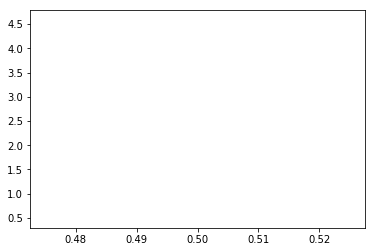

In [32]:
def gradient_descent(x,y,w):
    grad = 0
    for i in range(len(x)):
        hx = w * x[i]
        loss = (w * x[i] - y[i])**2  # 비용함수
        loss_grad = 2*(hx - y[i])*x[i]  #비용함수의 미분 
        grad += loss_grad
    return grad/len(x)



x =[1,2,3]
y = [1,2,3]
w = 10  # 임의의 값으로 일딴 시작( 기울기가 10 일때 의미)
old = 100
for i in range(100):  # 100번 학습시킬 것이댱!! 
    c = cost(x,y,w)
    grad = gradient_descent(x,y,w)
    w= w- grad * 0.01  # Learning Rate: 0.1
    print(i,c,w,grad)
    if c >= old and abs(c-old) < 1.0e-15:
        break
        old = c
    plt.plot((0.5),(0.5*w))

print('weight=', w)
    
    
plt.show()

In [ ]:
#  Car 의 속도(X) 와 제동거리 (Y)
# 데이터 셋 가져오기
import numpy as np
import tensorflow as tf
import  matplotlib.pyplot as plt

In [2]:
# delimiter: 구분자,
# unpack = True :  행과 열을 transpose 하여 읽어옴
# skiprows : 헤더를 제거하고 읽어옴

xy = np.loadtxt('cars.csv',unpack=True, delimiter=',',skiprows=1)
x = xy[0]
y = xy[1]

# train using placeholder

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# start training
for step in range(40001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                 feed_dict={ X:x, Y:y})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)

# predict : test model
# 속도가 30과 50일 때 제동거리를 예측해보세요
print(sess.run(hypothesis, feed_dict = {X:[30, 50]}))
print(sess.run(hypothesis, feed_dict = {X:[10,11,12,24,25]}))

print(W_val, b_val)

0 3466.5532 [-0.57043266] [-0.04201531]
20 259.39294 [2.9036686] [0.08694602]
40 259.12708 [2.9079087] [0.01415059]
60 258.86346 [2.9121304] [-0.05834495]
80 258.602 [2.9163346] [-0.13054171]
100 258.34265 [2.9205213] [-0.20244102]
120 258.0855 [2.924691] [-0.27404407]
140 257.8304 [2.9288435] [-0.345352]
160 257.57742 [2.9329789] [-0.4163662]
180 257.32657 [2.937097] [-0.4870877]
200 257.0777 [2.9411983] [-0.55751777]
220 256.8309 [2.945283] [-0.62765753]
240 256.58615 [2.9493504] [-0.6975083]
260 256.34344 [2.9534013] [-0.7670713]
280 256.10266 [2.9574354] [-0.8363474]
300 255.86385 [2.961453] [-0.9053383]
320 255.62708 [2.9654539] [-0.9740449]
340 255.39223 [2.9694383] [-1.0424684]
360 255.1593 [2.9734063] [-1.1106099]
380 254.9283 [2.977358] [-1.1784707]
400 254.69917 [2.9812937] [-1.2460518]
420 254.47194 [2.9852128] [-1.3133544]
440 254.24658 [2.9891157] [-1.3803798]
460 254.02309 [2.993003] [-1.4471289]
480 253.8014 [2.9968736] [-1.513603]
500 253.58154 [3.0007286] [-1.5798031]


4240 232.72954 [3.5019557] [-10.187131]
4260 232.68298 [3.503729] [-10.217588]
4280 232.63681 [3.5054958] [-10.247924]
4300 232.59103 [3.5072548] [-10.278133]
4320 232.54564 [3.5090067] [-10.308217]
4340 232.50063 [3.5107515] [-10.338179]
4360 232.45593 [3.512489] [-10.368015]
4380 232.41164 [3.5142193] [-10.397729]
4400 232.36772 [3.5159426] [-10.427321]
4420 232.32416 [3.5176587] [-10.456792]
4440 232.28094 [3.5193677] [-10.48614]
4460 232.23808 [3.5210698] [-10.5153675]
4480 232.19559 [3.5227647] [-10.544475]
4500 232.15344 [3.5244527] [-10.573462]
4520 232.1116 [3.5261338] [-10.602329]
4540 232.07016 [3.5278077] [-10.631078]
4560 232.02907 [3.529475] [-10.659708]
4580 231.98827 [3.5311356] [-10.68822]
4600 231.94783 [3.5327888] [-10.716615]
4620 231.90773 [3.5344355] [-10.744893]
4640 231.86794 [3.5360754] [-10.773054]
4660 231.82848 [3.5377085] [-10.8011]
4680 231.78937 [3.539335] [-10.829029]
4700 231.75055 [3.5409548] [-10.856844]
4720 231.71204 [3.542568] [-10.884544]
4740 231.

8400 228.08607 [3.75005] [-14.4475355]
8420 228.07773 [3.7508013] [-14.460439]
8440 228.06946 [3.7515497] [-14.47329]
8460 228.06122 [3.752295] [-14.486088]
8480 228.05309 [3.7530372] [-14.498833]
8500 228.045 [3.7537763] [-14.511525]
8520 228.03699 [3.7545123] [-14.524166]
8540 228.02902 [3.7552454] [-14.536755]
8560 228.02118 [3.7559755] [-14.549291]
8580 228.01334 [3.7567024] [-14.561775]
8600 228.00557 [3.7574265] [-14.574209]
8620 227.9979 [3.7581475] [-14.586591]
8640 227.99028 [3.7588656] [-14.598922]
8660 227.9827 [3.7595809] [-14.611203]
8680 227.97519 [3.760293] [-14.623432]
8700 227.96771 [3.761002] [-14.635612]
8720 227.96036 [3.7617085] [-14.647741]
8740 227.95305 [3.7624118] [-14.65982]
8760 227.94579 [3.7631123] [-14.671849]
8780 227.9386 [3.76381] [-14.683829]
8800 227.93144 [3.7645047] [-14.69576]
8820 227.92438 [3.7651966] [-14.707641]
8840 227.91736 [3.7658856] [-14.719473]
8860 227.91039 [3.7665718] [-14.7312565]
8880 227.90347 [3.767255] [-14.7429905]
8900 227.8966

12560 227.2527 [3.8551533] [-16.252426]
12580 227.2512 [3.8554714] [-16.257887]
12600 227.24973 [3.8557887] [-16.263336]
12620 227.24825 [3.8561041] [-16.268753]
12640 227.24677 [3.8564188] [-16.274153]
12660 227.24533 [3.856732] [-16.279531]
12680 227.24388 [3.8570433] [-16.284883]
12700 227.24246 [3.8573542] [-16.290224]
12720 227.24103 [3.8576634] [-16.295527]
12740 227.23965 [3.8579714] [-16.30082]
12760 227.23827 [3.858278] [-16.306084]
12780 227.23688 [3.8585835] [-16.311329]
12800 227.23549 [3.8588877] [-16.316555]
12820 227.23415 [3.8591907] [-16.321754]
12840 227.23282 [3.8594925] [-16.326942]
12860 227.23149 [3.8597927] [-16.332094]
12880 227.23018 [3.8600924] [-16.337238]
12900 227.22885 [3.86039] [-16.34235]
12920 227.22755 [3.8606868] [-16.347448]
12940 227.22626 [3.8609822] [-16.352522]
12960 227.22498 [3.8612766] [-16.357576]
12980 227.22368 [3.8615696] [-16.362612]
13000 227.22243 [3.8618615] [-16.36762]
13020 227.22118 [3.8621523] [-16.372618]
13040 227.21992 [3.862441

20820 227.07645 [3.9183683] [-17.337984]
20840 227.07643 [3.918426] [-17.338976]
20860 227.07632 [3.9184837] [-17.339968]
20880 227.07626 [3.9185414] [-17.34096]
20900 227.07622 [3.9185991] [-17.341951]
20920 227.07622 [3.9186568] [-17.342943]
20940 227.07617 [3.918714] [-17.343918]
20960 227.07613 [3.9187694] [-17.344872]
20980 227.07605 [3.918825] [-17.345825]
21000 227.07602 [3.9188805] [-17.346779]
21020 227.07596 [3.918936] [-17.347733]
21040 227.0759 [3.9189916] [-17.348686]
21060 227.07588 [3.919047] [-17.34964]
21080 227.07582 [3.9191027] [-17.350594]
21100 227.07578 [3.919158] [-17.351547]
21120 227.07574 [3.9192135] [-17.3525]
21140 227.0757 [3.9192674] [-17.353426]
21160 227.07567 [3.9193208] [-17.354342]
21180 227.07564 [3.919374] [-17.355257]
21200 227.07559 [3.9194274] [-17.356173]
21220 227.07555 [3.9194806] [-17.357088]
21240 227.07547 [3.919534] [-17.358004]
21260 227.07542 [3.9195871] [-17.35892]
21280 227.0754 [3.9196405] [-17.359835]
21300 227.07535 [3.9196937] [-17

25040 227.07149 [3.9265304] [-17.478148]
25060 227.07147 [3.9265547] [-17.478567]
25080 227.07144 [3.926579] [-17.478987]
25100 227.07144 [3.9266036] [-17.479406]
25120 227.07141 [3.9266279] [-17.479826]
25140 227.07144 [3.9266524] [-17.480246]
25160 227.07143 [3.9266768] [-17.480665]
25180 227.07141 [3.9267013] [-17.481085]
25200 227.07141 [3.9267256] [-17.481504]
25220 227.07141 [3.92675] [-17.481924]
25240 227.07141 [3.9267733] [-17.482319]
25260 227.07141 [3.9267955] [-17.4827]
25280 227.07141 [3.926818] [-17.483082]
25300 227.07138 [3.92684] [-17.483463]
25320 227.07137 [3.9268622] [-17.483845]
25340 227.07135 [3.9268844] [-17.484226]
25360 227.07133 [3.9269066] [-17.484608]
25380 227.07133 [3.9269288] [-17.48499]
25400 227.07133 [3.926951] [-17.48537]
25420 227.07133 [3.926973] [-17.485752]
25440 227.0713 [3.9269955] [-17.486134]
25460 227.07127 [3.9270177] [-17.486515]
25480 227.0713 [3.9270399] [-17.486897]
25500 227.07133 [3.927062] [-17.487278]
25520 227.07129 [3.9270842] [-1

29220 227.0706 [3.92993] [-17.53653]
29240 227.07062 [3.9299412] [-17.53672]
29260 227.07062 [3.9299521] [-17.536911]
29280 227.07059 [3.9299634] [-17.537102]
29300 227.07059 [3.9299743] [-17.537292]
29320 227.07057 [3.9299855] [-17.537481]
29340 227.07059 [3.929995] [-17.537642]
29360 227.07059 [3.930004] [-17.537794]
29380 227.07059 [3.9300127] [-17.537947]
29400 227.07057 [3.9300218] [-17.5381]
29420 227.07059 [3.9300306] [-17.538252]
29440 227.07059 [3.9300394] [-17.538404]
29460 227.07057 [3.9300485] [-17.538557]
29480 227.0706 [3.9300573] [-17.53871]
29500 227.07059 [3.930066] [-17.538862]
29520 227.07059 [3.930075] [-17.539015]
29540 227.07059 [3.930084] [-17.539167]
29560 227.07057 [3.9300928] [-17.53932]
29580 227.07059 [3.9301016] [-17.539473]
29600 227.07059 [3.9301105] [-17.539625]
29620 227.07059 [3.9301193] [-17.539778]
29640 227.07059 [3.9301283] [-17.53993]
29660 227.07059 [3.9301372] [-17.540083]
29680 227.07059 [3.930146] [-17.540236]
29700 227.07057 [3.9301548] [-17.

33420 227.07045 [3.9313462] [-17.560846]
33440 227.07047 [3.9313505] [-17.560923]
33460 227.07045 [3.931355] [-17.560999]
33480 227.07043 [3.9313595] [-17.561075]
33500 227.07047 [3.9313638] [-17.561152]
33520 227.07043 [3.9313684] [-17.561228]
33540 227.07045 [3.931373] [-17.561304]
33560 227.07047 [3.9313772] [-17.56138]
33580 227.07043 [3.9313817] [-17.561457]
33600 227.07043 [3.931386] [-17.561533]
33620 227.07045 [3.9313905] [-17.56161]
33640 227.07043 [3.931395] [-17.561686]
33660 227.07047 [3.9313993] [-17.561762]
33680 227.07045 [3.9314039] [-17.561838]
33700 227.07043 [3.9314084] [-17.561914]
33720 227.07045 [3.9314127] [-17.56199]
33740 227.07047 [3.9314172] [-17.562067]
33760 227.07045 [3.9314215] [-17.562143]
33780 227.07047 [3.931426] [-17.56222]
33800 227.07047 [3.9314306] [-17.562296]
33820 227.07047 [3.9314349] [-17.562372]
33840 227.07043 [3.9314394] [-17.562449]
33860 227.07043 [3.931444] [-17.562525]
33880 227.07043 [3.9314482] [-17.562601]
33900 227.07045 [3.9314528

37520 227.07043 [3.9319296] [-17.570868]
37540 227.07043 [3.931932] [-17.570906]
37560 227.07043 [3.931934] [-17.570944]
37580 227.07039 [3.9319363] [-17.570982]
37600 227.07043 [3.9319384] [-17.57102]
37620 227.07043 [3.9319408] [-17.571058]
37640 227.07043 [3.931943] [-17.571096]
37660 227.0704 [3.931945] [-17.571135]
37680 227.07043 [3.9319475] [-17.571173]
37700 227.07043 [3.9319496] [-17.57121]
37720 227.07043 [3.9319518] [-17.571249]
37740 227.07043 [3.9319541] [-17.571287]
37760 227.07043 [3.9319563] [-17.571325]
37780 227.07043 [3.9319584] [-17.571363]
37800 227.07043 [3.9319606] [-17.571402]
37820 227.07043 [3.931963] [-17.57144]
37840 227.0704 [3.931965] [-17.571478]
37860 227.07043 [3.9319675] [-17.571516]
37880 227.0704 [3.9319696] [-17.571554]
37900 227.07043 [3.9319718] [-17.571592]
37920 227.07045 [3.931974] [-17.57163]
37940 227.07043 [3.9319763] [-17.571669]
37960 227.07043 [3.9319785] [-17.571707]
37980 227.07043 [3.9319806] [-17.571745]
38000 227.07045 [3.931983] [-1

<Figure size 640x480 with 1 Axes>

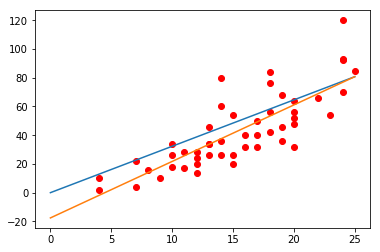

In [7]:
# 시각화 : matplotlib사용
def prediction(x,W,b):
    return W*x + b

plt.plot(x,y,'ro')  # 빨간색 동그라미 : ro cf)노란색: yo
plt.plot((0,25),(0,prediction(25,W_val,b_val)))
plt.plot((0,25),(prediction(0,W_val,b_val),prediction(25,W_val,b_val)))
plt.show()

# multi- variable linear regression

In [ ]:
# 입력변수 x가 두개 이상

# 입력 데이터 준비
x1_data = [73.,93.,89.,96.,73.]
    x2_data = [80.,88.,91.,98.,66.]
    x3_data = [75.,93.,90.,100.,70.]
    
y_data = [152.,185.,180.,196.,142.]

- sigmoid의 단점: 값을 너무 작게 만든다
- sigmoid를 여러개 써버리면 값이 너무작아지고 최악의 경우 사라진다(단점)
- softmax : scores----> prababilities(가능성,확률), 0~1 사이의 값이다 (총 확률: 1) ,전체중에 얘일 가능성~
- softmax 한 후 가장 큰 값을 고른다 : 아그맥스함수
- one hot encoding : 값이 3개 있어욥~
 - [1,0,0]  #1  1을 3개의 값에 대한 표현으로 나타낸다
 - [0,2,0]  #2
 - [0,0,3]  #3
 


In [8]:
#softmax_zoo__multi_classification.py
import tensorflow as tf
import numpy as np
# ex) 이런식으로  2차원 나타내기 [[]]
# numpy는 숫자만 처리 

xy = np.loadtxt('data-04-zoo.csv', delimiter =',',dtype = np.float32)
x_data = xy[:,:-1]    #(101, 16)
y_data = xy[:,[-1]]   #(101, 1)

# 입력변수는!!! placeholder!!
# Build Graph
# 변수생성

nb_classes = 7  #csv파일에서 y 값이 0~6까지 있어서 class 7개, type(6) 이라서 7개
X = tf.placeholder(tf.int32, shape =[None,16])   #[?,16]
print('X',X)
Y = tf.placeholder(tf.int32, shape =[None,1])    #[?,1]
print('Y',Y)

#Y 값을 one-hot encoding으로 변환 , Y값은 반드시 int형으로 입력
Y_one_hot = tf.one_hot(Y,nb_classes)  #[None,1,7]
Y_one_hot = tf.reshape(Y_one_hot,[-1,nb_classes])  #[None,7]


W = tf.Variable(tf.random_normal([16,1]), name ='weight')
b = tf.Variable(tf.random_normal([1]), name ='bias')   # one hot encoding 에서 class 갯수 만큼 b를 해줘야한디ㅏ 

logits = tf.matmul(X,W)+b


# # 예측방정식(Hypothesis)
# logits = tf.matmul(X,W) + b
# hypothesis = tf.nn.softmax(logits)

# #비용함수
# cost_i = tf.nn_softmax_cross_entropy_with_logits(logits=logits, label= Y_one_hot)
# cost = tf.reduce_mean(cost_i)

# #경사하강법
# Optimizer = tf.train.GrdientDescentOptimizer(learning_rate =0.01).minimize(cost)

# sess = tf.Session()
# sess.run(tf.global_variables_initializer())

# #학습단계(start learning)
# for step in range(2001):
#     cost_val,W_val,b_val,_ =\
#         sess.run([cost, W, b, Optimizer], feed_dict ={X:x_data,Y:y_data})
#     if step % 100==0:
#         print(step, cost_val, W_val, b_val)


# #검증단계(Test, 정확도 측정)
# #Accuracy Computatioin(정확도계산)
# predict = tf.argmax(hypothesis,1)
# corect_predict = tf.equal([predict,Y])  #TRUE/FAULSE 값 나옴
# accuracy = tf.reduce_mean(tf.cast(correct_predict, dtype = tf.float32))

# h,p,a = sess.run([hypothesis,predict,accuracy],feed_dict = {X:x_data, Y:y_data})
# print('\nhypothesis:',h,'\Predict',p,'\nAccuracy',a)

# #예측단계(predict : 답이 없는 데이터로 해야함)
# pred = sess.run(predict,feed_dict = {X:x_data, Y:y_data})

X Tensor("Placeholder_8:0", shape=(?, 16), dtype=int32)
Y Tensor("Placeholder_9:0", shape=(?, 1), dtype=int32)


TypeError: Input 'b' of 'MatMul' Op has type float32 that does not match type int32 of argument 'a'.

# 신경망

In [3]:
import tensorflow as tf
import numpy as np

In [2]:
# 신경망, 

# xor_sigmoid.py
import tensorflow as tf

x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

y_data = [[0],
          [1],
          [1],
          [0]]

X = tf.placeholder(tf.float32,shape=[None,2])
Y = tf.placeholder(tf.float32,shape=[None,1])

# Layer 1
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias2')
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)
# x(none, 2) * w(2, 2) = y(none, 2)

# Layer 2
W2 = tf.Variable(tf.random_normal([2,1]), name='weight1')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1,W2) + b2)
# (none, 2) + (2, 1) = (None, 1)

cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*
                       tf.log(1-hypothesis))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# accuracy computation
predict = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict,Y),
                                     dtype = tf.float32))
# start training
for step in range(10001):
    cost_val, W1_val, b1_val, W2_val, b2_val, _ = \
        sess.run([cost, W1, b1, W2, b2, train],
                 feed_dict={X:x_data, Y:y_data})
    if step % 20 == 0:
        print(step, cost_val, W1_val, b1_val, W2_val, b2_val)

# Accuracy report
h,p,a = sess.run([hypothesis,predict,accuracy],
                 feed_dict={X: x_data,Y:y_data})
print("\nHypothesis:",h, "\nPredict:",p,"\nAccuracy:",a)

# predict : test model

print(sess.run(predict, feed_dict = {X:x_data}))

0 0.7240876 [[-2.5462167e-04  1.6758459e+00]
 [-3.4349227e-01 -1.3849021e+00]] [0.8644415 1.0450672] [[0.3986716 ]
 [0.28873363]] [-0.03349162]
20 0.69884217 [[-0.00830788  1.6684245 ]
 [-0.34837314 -1.3834296 ]] [0.8538862 1.0373938] [[0.30848947]
 [0.14281656]] [-0.1683629]
40 0.6948029 [[-0.01163539  1.6653647 ]
 [-0.3493529  -1.3817413 ]] [0.85140085 1.0352474 ] [[0.28254905]
 [0.06848568]] [-0.20700823]
60 0.6936269 [[-0.01356811  1.6641552 ]
 [-0.34924996 -1.380876  ]] [0.85123783 1.034582  ] [[0.2800548 ]
 [0.02072115]] [-0.21043168]
80 0.69284546 [[-0.01501852  1.6640942 ]
 [-0.34881297 -1.380831  ]] [0.85186636 1.0345502 ] [[ 0.28602004]
 [-0.01713854]] [-0.20120019]
100 0.69212997 [[-0.01627917  1.664959  ]
 [-0.34828505 -1.3815255 ]] [0.85279506 1.0349612 ] [[ 0.2950086 ]
 [-0.05117426]] [-0.18751447]
120 0.69143414 [[-0.01745061  1.6666687 ]
 [-0.3477555  -1.3829021 ]] [0.8538493 1.0357767] [[ 0.30505127]
 [-0.0836161 ]] [-0.17234528]
140 0.69074976 [[-0.01856666  1.6691884

1240 0.6204526 [[ 0.11310419  2.7789526 ]
 [-0.5220479  -2.3681562 ]] [0.93631434 1.7002215 ] [[ 1.0328604]
 [-1.8799342]] [0.71634656]
1260 0.61815405 [[ 0.12108981  2.8111396 ]
 [-0.5321925  -2.399803  ]] [0.93629324 1.719911  ] [[ 1.0517646]
 [-1.9166098]] [0.7337211]
1280 0.6158259 [[ 0.12929522  2.8434584 ]
 [-0.54276496 -2.4316728 ]] [0.9360315 1.7397163] [[ 1.0710019]
 [-1.9533824]] [0.7510872]
1300 0.61346936 [[ 0.1377172  2.8758893]
 [-0.5537784 -2.4637449]] [0.93550956 1.759627  ] [[ 1.090581 ]
 [-1.9902403]] [0.7684401]
1320 0.61108553 [[ 0.14635244  2.9084134 ]
 [-0.56524634 -2.4960008 ]] [0.9347068 1.779632 ] [[ 1.1105119]
 [-2.0271728]] [0.7857754]
1340 0.6086756 [[ 0.15519772  2.941011  ]
 [-0.5771824  -2.5284202 ]] [0.933602  1.7997203] [[ 1.1308048]
 [-2.0641682]] [0.8030888]
1360 0.6062404 [[ 0.16424984  2.9736629 ]
 [-0.5896008  -2.5609846 ]] [0.93217283 1.8198807 ] [[ 1.1514698]
 [-2.101216 ]] [0.8203772]
1380 0.60378087 [[ 0.17350581  3.0063508 ]
 [-0.60251576 -2.5

2580 0.29220718 [[ 2.0495698  4.683152 ]
 [-2.66907   -4.561569 ]] [-0.84618944  2.774089  ] [[ 3.9129047]
 [-4.423767 ]] [2.057357]
2600 0.2837822 [[ 2.1097157  4.7042775]
 [-2.7180035 -4.587737 ]] [-0.8914189  2.7816632] [[ 3.98659  ]
 [-4.4658575]] [2.0775456]
2620 0.2755701 [[ 2.1689453  4.725112 ]
 [-2.7662709 -4.6133943]] [-0.9352762  2.7889662] [[ 4.0598044]
 [-4.5079503]] [2.0972967]
2640 0.26758316 [[ 2.2271671  4.7456527]
 [-2.813822  -4.6385484]] [-0.9777642  2.796003 ] [[ 4.1324434]
 [-4.5500064]] [2.1166313]
2660 0.2598307 [[ 2.2843053  4.7658987]
 [-2.860615  -4.6632066]] [-1.0188956  2.8027806] [[ 4.204411]
 [-4.591986]] [2.1355715]
2680 0.25231928 [[ 2.3402996  4.7858486]
 [-2.9066148 -4.6873784]] [-1.0586919  2.8093064] [[ 4.2756233]
 [-4.6338515]] [2.1541388]
2700 0.24505256 [[ 2.3951044  4.8055024]
 [-2.9517932 -4.7110724]] [-1.0971805  2.8155894] [[ 4.346008 ]
 [-4.6755657]] [2.172356]
2720 0.23803192 [[ 2.4486876  4.8248606]
 [-2.9961298 -4.7342944]] [-1.1343937  2

3900 0.07282284 [[ 4.1044707  5.5775948]
 [-4.471478  -5.5552955]] [-2.1629465  3.0091355] [[ 6.988331]
 [-6.554661]] [2.9638286]
3920 0.07187495 [[ 4.1188345  5.5859632]
 [-4.4850674 -5.563597 ]] [-2.1712098  3.011247 ] [[ 7.0148683]
 [-6.576791 ]] [2.973812]
3940 0.07094973 [[ 4.1329794  5.594238 ]
 [-4.498457  -5.571793 ]] [-2.1793385  3.0133426] [[ 7.0410805]
 [-6.5987086]] [2.9837165]
3960 0.07004641 [[ 4.146909   5.602422 ]
 [-4.511651  -5.5798855]] [-2.1873355  3.0154228] [[ 7.066973 ]
 [-6.6204157]] [2.9935431]
3980 0.06916435 [[ 4.160631   5.610517 ]
 [-4.5246544 -5.587877 ]] [-2.195205   3.0174878] [[ 7.0925536]
 [-6.641917 ]] [3.0032926]
4000 0.068302706 [[ 4.174149   5.618525 ]
 [-4.537475  -5.5957685]] [-2.2029498  3.0195374] [[ 7.117829 ]
 [-6.6632156]] [3.0129657]
4020 0.06746088 [[ 4.187467   5.626447 ]
 [-4.5501137 -5.6035647]] [-2.2105732  3.021572 ] [[ 7.142806 ]
 [-6.6843157]] [3.0225637]
4040 0.06663823 [[ 4.2005944  5.6342854]
 [-4.5625772 -5.6112657]] [-2.218079 

5180 0.038760234 [[ 4.7350545  5.978873 ]
 [-5.074594  -5.9401617]] [-2.5176525  3.119659 ] [[ 8.234904 ]
 [-7.6525917]] [3.4768183]
5200 0.038470797 [[ 4.741898   5.983596 ]
 [-5.081194  -5.9445653]] [-2.521413   3.1210759] [[ 8.249402]
 [-7.665977]] [3.4832535]
5220 0.038185474 [[ 4.7486815  5.9882846]
 [-5.087737  -5.948936 ]] [-2.5251389  3.1224852] [[ 8.263795 ]
 [-7.6792774]] [3.4896512]
5240 0.037904117 [[ 4.7554064  5.9929404]
 [-5.0942245 -5.953273 ]] [-2.5288308  3.1238873] [[ 8.278085 ]
 [-7.6924944]] [3.496012]
5260 0.03762677 [[ 4.7620735  5.9975624]
 [-5.1006565 -5.957577 ]] [-2.5324888  3.1252818] [[ 8.292273 ]
 [-7.7056284]] [3.5023363]
5280 0.037353262 [[ 4.7686834  6.002153 ]
 [-5.107034  -5.9618497]] [-2.5361137  3.1266692] [[ 8.30636 ]
 [-7.718681]] [3.5086243]
5300 0.037083555 [[ 4.775237  6.00671 ]
 [-5.113359 -5.96609 ]] [-2.5397067  3.1280494] [[ 8.320349 ]
 [-7.7316523]] [3.5148766]
5320 0.036817554 [[ 4.781736   6.0112357]
 [-5.119631  -5.9702992]] [-2.543268 

6540 0.025491973 [[ 5.0987315  6.2397623]
 [-5.426305  -6.1808643]] [-2.7149777  3.201846 ] [[ 9.037271]
 [-8.409511]] [3.8453307]
6560 0.025362492 [[ 5.102933   6.242888 ]
 [-5.430377  -6.1837234]] [-2.7172282  3.2028773] [[ 9.046937]
 [-8.418803]] [3.8499045]
6580 0.025234276 [[ 5.1071095  6.245998 ]
 [-5.4344254 -6.1865687]] [-2.7194648  3.2039046] [[ 9.056554]
 [-8.428055]] [3.8544588]
6600 0.025107302 [[ 5.1112614  6.249092 ]
 [-5.438451  -6.1893973]] [-2.7216878  3.204928 ] [[ 9.066125]
 [-8.437264]] [3.858993]
6620 0.024981536 [[ 5.11539    6.2521706]
 [-5.442453  -6.192212 ]] [-2.723897   3.2059472] [[ 9.075646]
 [-8.446432]] [3.8635082]
6640 0.024857039 [[ 5.119494   6.255234 ]
 [-5.4464316 -6.1950116]] [-2.7260928  3.2069623] [[ 9.085124]
 [-8.455559]] [3.8680043]
6660 0.024733735 [[ 5.1235747  6.258281 ]
 [-5.450388  -6.197798 ]] [-2.7282755  3.2079732] [[ 9.094555]
 [-8.464644]] [3.8724813]
6680 0.024611544 [[ 5.127631   6.2613134]
 [-5.4543214 -6.2005687]] [-2.730445   3.2

7820 0.019172128 [[ 5.3267107  6.412774 ]
 [-5.647547  -6.3385983]] [-2.8361948  3.260498 ] [[ 9.575644]
 [-8.932227]] [4.1039805]
7840 0.019097583 [[ 5.329733   6.4151125]
 [-5.650483  -6.340725 ]] [-2.83779    3.2613125] [[ 9.582977]
 [-8.939411]] [4.1075525]
7860 0.019023575 [[ 5.332742   6.4174414]
 [-5.6534066 -6.342842 ]] [-2.8393776  3.262123 ] [[ 9.590284]
 [-8.946571]] [4.111113]
7880 0.018950135 [[ 5.3357387  6.419761 ]
 [-5.6563177 -6.344951 ]] [-2.840958   3.2629316] [[ 9.597563]
 [-8.953706]] [4.114661]
7900 0.018877275 [[ 5.3387203  6.4220715]
 [-5.6592145 -6.3470516]] [-2.842531   3.2637374] [[ 9.604816 ]
 [-8.9608135]] [4.1181965]
7920 0.018804941 [[ 5.34169    6.4243727]
 [-5.6620994 -6.349144 ]] [-2.844097   3.2645402] [[ 9.61204 ]
 [-8.967897]] [4.1217203]
7940 0.018733095 [[ 5.344646   6.426665 ]
 [-5.6649723 -6.3512278]] [-2.8456552  3.2653413] [[ 9.619238 ]
 [-8.9749565]] [4.1252327]
7960 0.01866185 [[ 5.347589   6.428948 ]
 [-5.6678314 -6.3533034]] [-2.8472068  3

 [-9.37021 ]] [4.322449]
9200 0.015083932 [[ 5.5083833  6.555241 ]
 [-5.824184  -6.468011 ]] [-2.9315565  3.3110561] [[10.02599 ]
 [-9.375987]] [4.325339]
9220 0.015037203 [[ 5.5106773  6.5570626]
 [-5.8264155 -6.4696665]] [-2.932754   3.3117142] [[10.031804]
 [-9.381747]] [4.32822]
9240 0.01499075 [[ 5.512964   6.5588803]
 [-5.8286395 -6.4713163]] [-2.9339473  3.3123722] [[10.037601]
 [-9.387489]] [4.3310933]
9260 0.014944615 [[ 5.515242   6.5606923]
 [-5.830856  -6.47296  ]] [-2.9351363  3.3130283] [[10.043381]
 [-9.393215]] [4.333959]
9280 0.01489874 [[ 5.517512   6.562497 ]
 [-5.833065  -6.4746003]] [-2.9363208  3.3136816] [[10.049142]
 [-9.398926]] [4.336817]
9300 0.014853109 [[ 5.519773   6.5642986]
 [-5.835267  -6.4762325]] [-2.937501   3.3143349] [[10.054886]
 [-9.40462 ]] [4.339667]
9320 0.014807782 [[ 5.5220265  6.5660915]
 [-5.8374605 -6.4778633]] [-2.938677   3.3149846] [[10.060613]
 [-9.410299]] [4.342509]
9340 0.014762701 [[ 5.5242724  6.56788  ]
 [-5.839646  -6.4794846]]

## MNIST(Modified National Institute of Satandard Technology database)
#### 손글씨체 이미지 : 28*28 = 784, [0,1,2,3,4,5,6,7,8,9]
#### train data: 55,000개 , train-images-idx3-ubyte.gz
##### test data : 10,000 개 ,  

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
# one hot encoding <-> argmax
mnist = input_data.read_data_sets('mnist_data/',one_hot = True) # mnist_data라는 폴더를 만들고 그 안에 압축을 푼다
mnist.train.images.shape    #(55000, 784)
mnist.train.labels.shape  #(55000, 10)

mnist.test.images.shape    #(10000, 784)
mnist.test.labels.shape  #(10000, 10)

num = 5
plt.imshow(mnist.train.images[num:num+1].reshape(28,28),
           cmap = 'Greys',interpolation = 'nearest')
print(mnist.train.labels[num:num+1])
plt.show()

W0822 11:03:38.628962  8988 deprecation.py:323] From <ipython-input-4-971e83cb6d17>:5: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0822 11:03:38.628962  8988 deprecation.py:323] From C:\Users\CPB06GameN\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0822 11:03:38.628962  8988 deprecation.py:323] From C:\Users\CPB06GameN\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updati

Extracting mnist_data/train-images-idx3-ubyte.gz


W0822 11:03:38.872891  8988 deprecation.py:323] From C:\Users\CPB06GameN\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0822 11:03:38.874886  8988 deprecation.py:323] From C:\Users\CPB06GameN\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0822 11:03:38.921042  8988 deprecation.py:323] From C:\Users\CPB06GameN\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed i

Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


<Figure size 640x480 with 1 Axes>

In [3]:
tf.set_random_seed(777) # seed하면 고정하기 때문에 성능에는 영향을 주지 않음 
learning_rate = 0.01
training_epochs = 15
batch_size = 100 # 배치 싸이즈 클수록 for문 작아짐, 배치사이즈 크다? = 듬성듬성 가져오겠다, 배치사이즈 작다?= 조밀하게 가져오겠다

X = tf.placeholder(tf.float32, shape = [None,784])  #이 데이터 자체가 원 hot으로 되어있어서 어떤형태든 상관이 없다
Y = tf.placeholder(tf.float32, shape = [None,10])  #참고) one-hot은 3차, 차로 돌려줘야함

W = tf.Variable(tf.random_normal([784,10]), name ='weight')
b = tf.Variable(tf.random_normal([10]), name ='bias')


#      (?,784)*(784,10) = (?,10)
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

cost_i = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                    logits= logits, labels = Y))
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_i)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Starting Train

for epoch in range(training_epochs):
    
    total_batch = int(mnist.train.num_exaples/batch_size)
#     550   = 55000/100
    for i in range(total_batch):   # 550회
        batch_xs.batch_ys = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimizer],feed_dict ={X:batch_xs,Y:batch_ys} )
        avg_cost += c/batch_size
    print('Epoch:',epoch,'cost:',avg_cost)
print('Learning Finish')

#Accuracy 
predict = tf.argmax(hypothesis,1) # 1은 열로 찾아랏
correct_predict = tf.equal(predict,tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict,dtype = tf.float32))

a = sess.run([accuracy],feed_dict ={X:[mnist_data,test,images],Y:[mnist,test,labels]})
print('\nAccuracy:',a)

#predict
import random
r = random.radint(0,mnist.test.num_examples -1)
p =sess.run(predict,feed_dict={X:mnist,test,images[r:r+1]})

SyntaxError: invalid syntax (<ipython-input-3-1eb9ad78a569>, line 48)


mini batch: 대용량 데이터에서 표본 추출 

### 정확도 향상 방안

1. AdamOptimizer 사용
2. ReLU사용
3. xavier_initializer사용: weight의 초기값을 할당
4. DNN 사용 : 3층 -> 5층
5. dropout사용

약 97% 향상